In [1]:
%run my_functions.ipynb

In [2]:
from qiskit.circuit.library import QFT

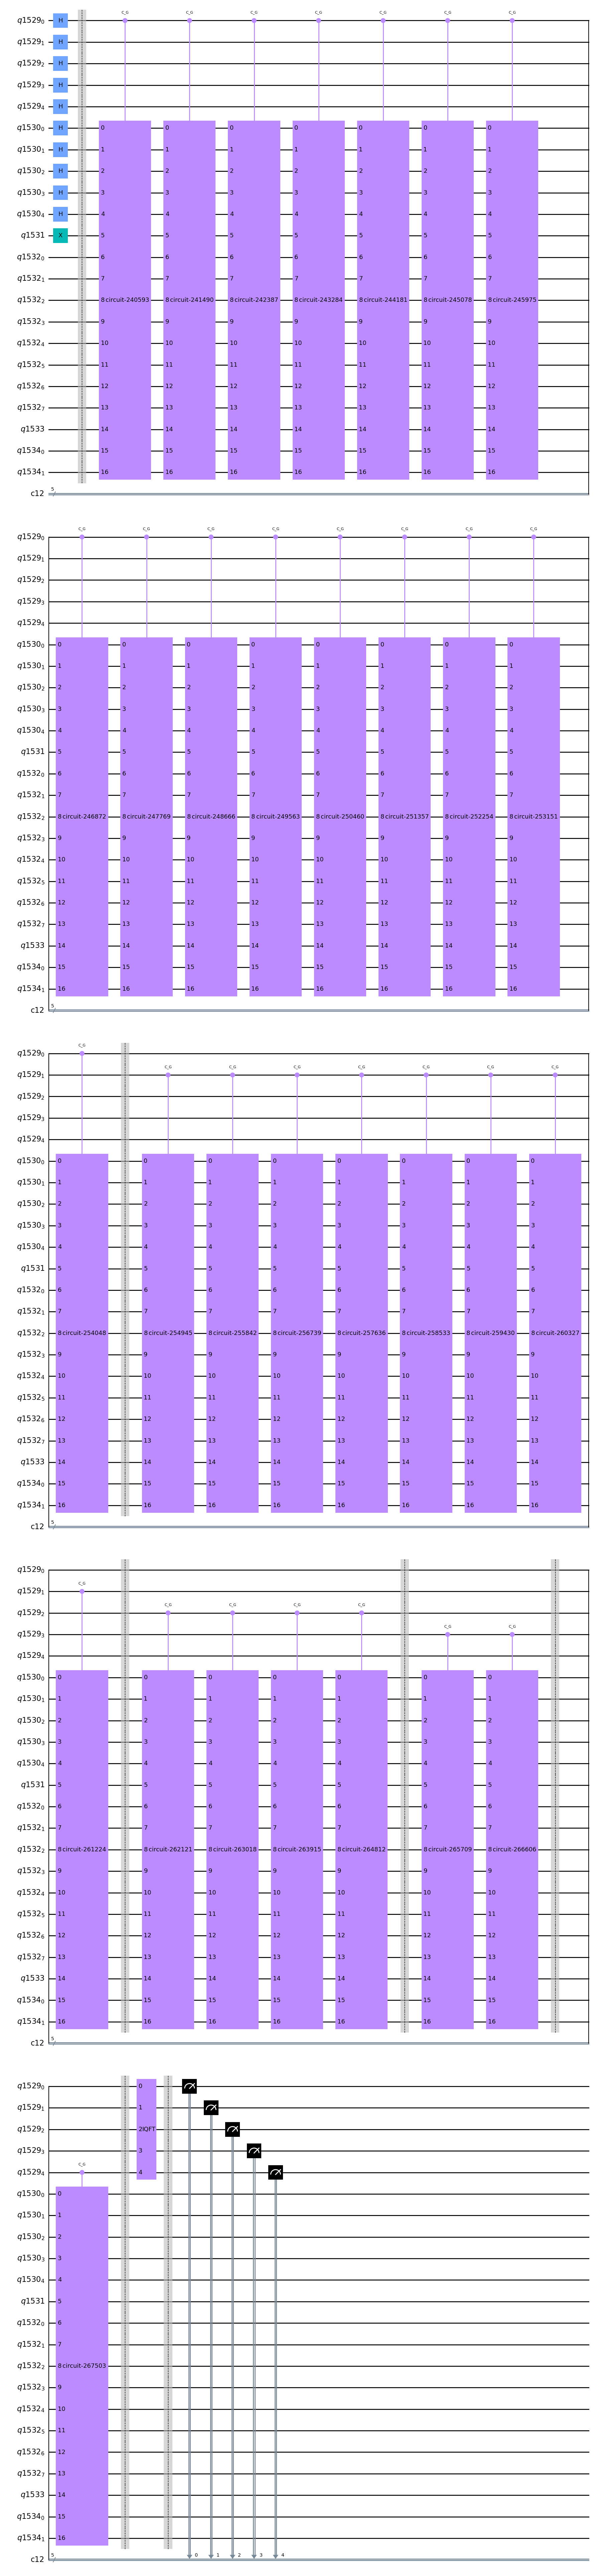

In [28]:
#Sat formula from hybrid problem 6
sat_formula = [[1,2,-3],[-1,-2,4],[2,-4,-5],[1,-3,5],[-1,3,-4],[3,4,-5],
               [2,3,-4],[-2,-3,5]]

#It has 11 solutions according to brute force method

m = 5
e = 1/10
circuit = quantum_counting(sat_formula,m,e)
circuit.draw('mpl')

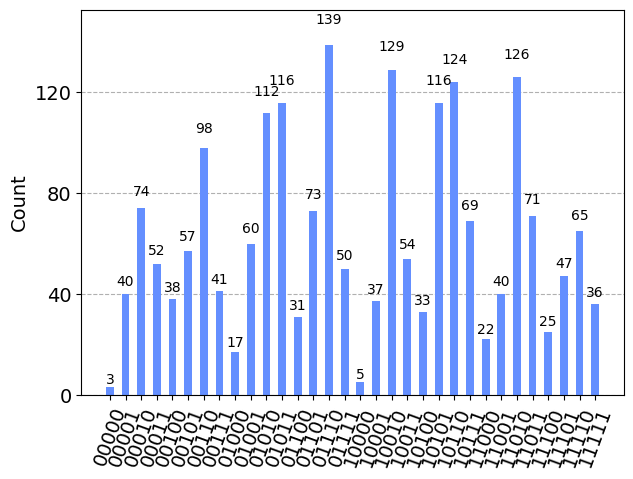

In [34]:
counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
plot_histogram(counts)

In [35]:
measured_str = max(counts, key=counts.get)[::-1]
measured_int = int(measured_str,2)
measured_int

14

In [36]:
#Number of marked elements
t = m + math.floor(math.log(2+0.5/e))
n = max(max(sat_clause) for sat_clause in sat_formula)
N = 2**n
angle = math.pi*measured_int/(2**t)
M = N * (math.sin(angle/2))**2
print(f'Number of solutions: {round(N-M)}')
print(round(M))

Number of solutions: 19
13


### Loop over m from 1 to n/2 or n and plot it. Try to make sense out of the plot

### Also, always add a qubit and increase the search space by 2 times. This provides an advantage when number of solution => N/2. Other cases, it might prove to get us a good approximated of num of solns in quantum counting algorithm

### Finding the behaviour of num of solutions as a function of m

In [37]:
n = max(max(sat_clause) for sat_clause in sat_formula)
N = 2**n
numsols = []
sols_rem = []
i = list(range(1,n+1))
for m in i:
    e = 1/10
    circuit = quantum_counting(sat_formula,m,e)
    counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
    measured_str = max(counts, key=counts.get)[::-1]
    measured_int = int(measured_str,2)
    #Number of marked elements
    t = m + math.floor(math.log(2+0.5/e))
    angle = math.pi*measured_int/(2**t)
    M = N * (math.sin(angle/2))**2
    numsols.append(round(N-M))
    sols_rem.append(M)

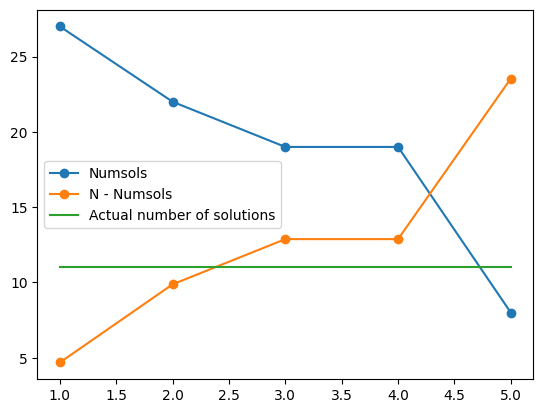

In [38]:
solution = [11]*len(i)
plt.plot(i,numsols, '-o', label='Numsols')
plt.plot(i,sols_rem,'-o', label='N - Numsols')
plt.plot(i,solution,label='Actual number of solutions')
plt.legend()

In [39]:
theta = []
num_iter = []
for i in range(len(numsols)):
    theta.append(math.sqrt(numsols[i]/N))
    num_iter.append(round(math.pi/(4*theta[i]) - 0.5))

In [40]:
theta

[0.9185586535436918,
 0.82915619758885,
 0.770551750371122,
 0.770551750371122,
 0.5]

In [41]:
num_iter

[0, 0, 1, 1, 1]